# Data Cleaning and Analysis: Employee Exit Surveys

# Table of Contents
[Introduction](#Introduction)

[Data Dictionary](#Data-Dictionary)
  
  - [DETE Survey Data Dictionary](#DETE-Survey-Data-Dictionary)
  
  - [TAFE Survey Data Dictionary](#TAFE-Survey-Data-Dictionary)
  
[Data Cleaning](#Data-Cleaning)

  - [Dropping Unnecessary Columns](#Dropping-Unnecessary-Columns)
  
  - [Cleaning Column Names](#Cleaning-Column-Names)
  
  - [Filter the Data](#Filter-the-Data)
  
  - [Verify the Data](#Verify-the-Data)
  
[Data Processing](#Data-Processing)

  - [Creating a New Column for DETE Dataset](#Creating-a-New-Column-for-DETE-Dataset)
  
  - [Identifying Dissatisfied Employee (TAFE)](#Identifying-Dissatisfied-Employee-(TAFE))
  
  - [Identifying Dissatisfied Employee (DETE)](#Identifying-Dissatisfied-Employee-(DETE))
  
  - [Combining the Data](#Combining-the-Data)
  
[Data Analysis](#Data-Analysis)

  - [Percentage Based on Length of Service](#Percentage-Based-on-Length-of-Service)
  
  - [Percentage Based on Aged Group](Percentage-Based-on-Aged-Group)
  
[Conclusion](Conclusion)

# Introduction

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the **Technical and Further Education (TAFE) institute in Queensland, Australia.**

_**The objective of our analysis is to answer the following questins:**_

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will combine the results for both surveys to answer the questions above


# Data Dictionary

## DETE Survey Data Dictionary

|Varible|Description|
|-------|-----------|
|ID|An id used to identify the participant of the survey
|SeparationType| The reason why the person's employment ended|
|Cease Date|The year or month the person's employment ended|
|DETE Start Date|The year the person began employment with the DETE|

## TAFE Survey Data Dictionary

|Variable|Description|
|--------|-----------|
|Record ID|An id used to identify the participant of the survey|
|Reason for ceasing employment|The reason why the person's employment ended|
|LengthServiceOverall.Overall Length of Service at Institute(in years)|The lenght of the person's employment(in years)|


In [2]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style


#Reading in the dete_survey.csv

dete_survey = pd.read_csv('dete_survey.csv')

In [3]:
#Reading in the tafe_survey

tafe_survey = pd.read_csv('tafe_survey.csv')

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


**DETE Dataset Observations**
- The dataset has 56 columns and 822 rows.
- The 56 columns have boolean, interger and string data types
- There are columns with missing values. Some columns have value that are less than 10
- Most of the columns that are essential for our analysis have non-null values.

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [9]:
dete_survey['Cease Date'].value_counts()

Cease Date
2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
07/2014         2
02/2014         2
04/2014         2
08/2012         2
04/2013         2
2014            1
07/2012         1
2010            1
11/2012         1
09/2010         1
09/2014         1
07/2006         1
Name: count, dtype: int64

**Observation for both datasets**

The dete_survey dataframe; the cease date column contains _'Not Started'_ values indicative of values that are missing(they aren't represented as NaN). Additionally, both `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need for our analysis.

Each dataframe contains many of the same columns though the names are different. Also, there are multiple columns that indicate an employee resigned because of dissatisfaction.

# Data Cleaning

## Dropping Unnecessary Columns

In [10]:
#Read in the dete_survey.csv to specify 'Not Started' to be
#represented as NaN

dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated'])

In [11]:
#drop dete_survey columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

#drop tafe_survey columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [12]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [13]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

**Observation:**

We have dropped some unnecessary columns from both datasets that adds no value to our analysis vis a vis our objective.
- `dete_survey_updated` now have 35 columns down from 56
- `tafe_survey_updated` now have 23 columns down from 72

## Cleaning Column Names

Each dataframe contains many of the same columns, but the column names are different. We are going to standardize the column names for both dataframes.

In [14]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace('\s+', ' ', regex=True).str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [15]:
tafe_survey_updated = tafe_survey_updated.rename({'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [16]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [17]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


After renaming the column names, we now have columns from both datasets with similar names which will make it easier in case we need to merge the datasets.

## Filter the Data

In [18]:
dete_survey_updated['separationtype'].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [19]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: count, dtype: int64

In [20]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str.get(0)
dete_survey_updated['separationtype'].value_counts()

separationtype
Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: count, dtype: int64

In [21]:
dete_resignations = dete_survey_updated.copy()[(dete_survey_updated['separationtype'] == 'Resignation')]
tafe_resignations = tafe_survey_updated.copy()[(tafe_survey_updated['separationtype'] == 'Resignation')]

The objective of our analysis was to determine why employees resign. To align our research to this objective, we have identified a series; `separationtype` for both datasets that contains the string **'Resignation'**. We have filtered the series for both the datasets to remain with those rows that highlight 'Resignation' as the reason for quitting. 

## Verify the Data

In [22]:
dete_resignations['cease_date'].value_counts(dropna=False)

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2012      1
07/2006      1
Name: count, dtype: int64

Above, we can see that the `cease_date` column have inconsistencies in regards to how the years have been arranged. Some years have months while others are lacking. We will clean the column to only remain with years as the important variable for our analysis.

In [23]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r"([1-2][0-9]{3})")
dete_resignations['cease_date'].value_counts(dropna=False)

cease_date
2013    146
2012    129
2014     22
NaN      11
2010      2
2006      1
Name: count, dtype: int64

In [24]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

cease_date
2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
NaN        11
Name: count, dtype: int64

In [25]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index(ascending=False)

dete_start_date
2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
NaN       28
Name: count, dtype: int64

In [26]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

cease_date
2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
NaN         5
Name: count, dtype: int64

From the findings above we observe the following:
- `cease_date` columnn in dete_resignations has **11** rows with missing values
- `dete_start_date` columns in dete_resignations has **28** missing values
- `cease_date` column in tafe_resignations has **5** missing values

Since we will be calculating the length of service of the employees, the dates in start dates are very key for this analysis. We therefore have no business with missing values in the start date column hence we will have to drop those rows.

In [27]:
dete_resignations = dete_resignations.dropna(subset =['dete_start_date'])
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index(ascending=False)

dete_start_date
2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: count, dtype: int64

# Data Processing

## Creating a New Column for DETE Dataset 

In [28]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

Above we have created a new column; `institute_service` in the DETE dataset. This column stores the length of time an employee spent in the workplace.

## Identifying Dissatisfied Employee (TAFE)

Our aim is to find the employees who resigned due to dissatisfaction. In TAFE dataset, we have identified 2 columns i.e. `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` that we need to manipulate into formats that makes them easier for our analysis.

In [29]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64

In [30]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64

In [31]:
#Helper function for categorizing 
#'Contributing Factors. Job Dissatisfaction'
# to 'true' or 'false'

def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

Below, we will convert the information in this two columns to indicate whether the factors therein are `true` or `false`

In [32]:
factors_tafe = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[factors_tafe].map(update_vals).any(axis=1)

In [33]:
tafe_resignations_up = tafe_resignations.copy()

## Identifying Dissatisfied Employee (DETE)

In [34]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 3 to 819
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   283 non-null    int64  
 1   separationtype                       283 non-null    object 
 2   cease_date                           273 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      270 non-null    float64
 5   position                             280 non-null    object 
 6   classification                       151 non-null    object 
 7   region                               244 non-null    object 
 8   business_unit                        28 non-null     object 
 9   employment_status                    283 non-null    object 
 10  career_move_to_public_sector         283 non-null    bool   
 11  career_move_to_private_sector        

In DETE dataset, we will use 9 categorical columns for our analysis i.e `job_dissatisfaction`, `dissatisfaction_with_the_department`, `physical_work_environment`, `lack_of_recognition`, `lack_of_job_security`, `work_location`, `employment_conditions`, `work_life_balance`, `workload`. The columns contain boolean values (True/False) with non-null values. We will therefore create a column; `dissatisfied`.

In [35]:
factors_dete = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']
dete_resignations['dissatisfied'] = dete_resignations[factors_dete].any(axis=1)

In [36]:
dete_resignations_up = dete_resignations.copy()

## Combining the Data

In [37]:
# Adding a column to distinguish between  DETE and TAFE datasets
dete_resignations_up['institute']  = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [38]:
combined = pd.concat([dete_resignations, tafe_resignations], ignore_index=True)

In [39]:
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
combined.notnull().sum()

id                                                     623
separationtype                                         623
cease_date                                             608
dete_start_date                                        283
role_start_date                                        270
position                                               570
classification                                         151
region                                                 244
business_unit                                           28
employment_status                                      573
career_move_to_public_sector                           283
career_move_to_private_sector                          283
interpersonal_conflicts                                283
job_dissatisfaction                                    283
dissatisfaction_with_the_department                    283
physical_work_environment                              283
lack_of_recognition                                    2

The notnull() method gives us the values that are not missing as a threshold for dropping columns with less than 500 non-null values. Less than 10 columns will be useful for our analysis. The rest will be dropped.

In [41]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

## Clean the Service Column

In [42]:
combined_updated.tail(10)

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied
613,6.350480e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Male,41 45,Less than 1 year,True
614,6.350496e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False
615,6.350496e+17,Resignation,2013.0,Operational (OO),Permanent Part-time,Female,56 or older,3-4,False
616,6.350599e+17,Resignation,2013.0,Administration (AO),Temporary Full-time,Female,26 30,1-2,False
617,6.350652e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False
618,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False
619,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False
620,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False
621,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False
622,6.350730e+17,Resignation,2013.0,Administration (AO),Contract/casual,Female,26 30,3-4,False


In [43]:
combined_updated['institute_service'].value_counts(dropna=False)

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
NaN                   60
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
17.0                   6
14.0                   6
10.0                   6
12.0                   6
22.0                   6
16.0                   5
18.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
25.0                   2
36.0                   2
30.0                   2
28.0                   2
26.0   

`institute_service` column contains values in different forms(shown above). We will clean and categorize the data to take the below format;
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [44]:
#Extracting the years of service from each value
#in institute_service column

combined_updated['institute_service'] = combined_updated['institute_service'].astype(str).str.extract(r'(\d+)')

In [45]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')

In [46]:
#Creating a helpfunction that maps each value to one of the career stages

def career_stages(val):
    if pd.isnull(val):
        return np.nan
    elif val<3:
        return 'New'
    elif (val>=3)&(val<=6):
        return 'Experienced'
    elif (val>=7)&(val<10):
        return 'Established'
    else:
        return 'Veteran'

In [47]:
#Applying the function to institute_service column

combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stages)
combined_updated['service_cat'].value_counts(dropna=False)

service_cat
New            193
Experienced    172
Veteran        142
NaN             60
Established     56
Name: count, dtype: int64

Above, the service column was cleaned to enhance further analysis. We followed the subsequent steps below:
- Extracted the years from each value in the institute_service column
- Mapped each value to one of the career stage definations

Our findings have estblished that most of the employees have spent less than 3 years of service in their workplace.

# Data Analysis

## Percentage Based on Length of Service (Calculation and Visualization)



In this category, we will calculate and visualize the percentage of employees who resigned due to dissatisfaction based on length of service.

In [48]:
combined_updated['dissatisfied'].fillna(False)

combined_updated['dissatisfied'].value_counts()


dissatisfied
False    393
True     230
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

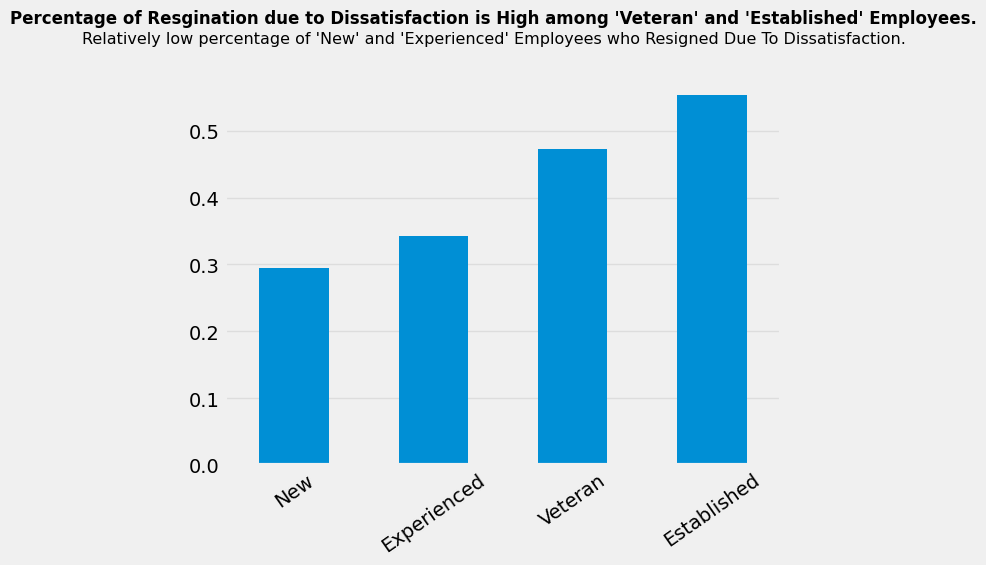

In [49]:
diss_pvt = combined_updated.pivot_table(values= 'dissatisfied', index='service_cat')

plt.figure(figsize=(12,8))
order = ['New','Experienced','Veteran','Established']
diss_pvt = diss_pvt.reindex(order)
style.use('fivethirtyeight')
diss_pvt.plot(kind='bar', legend=False, rot=35)
plt.xlabel('')
plt.grid(axis='x', visible=False)
plt.grid(axis='y', alpha=0.5)
plt.suptitle("Percentage of Resgination due to Dissatisfaction is High among 'Veteran' and 'Established' Employees.", ha='center', weight='bold', size=12, x=0.5, y=1.02)
plt.figtext(s="Relatively low percentage of 'New' and 'Experienced' Employees who Resigned Due To Dissatisfaction.", ha='center', size=11.5, x=0.5, y=0.95)
plt.show()

The analysis above illustrates that employees with a length service of 7 years and above (veterans and the established), are more likely to resign due to dissatisfaction compared to employees with less than 7 years ('Newbies' and 'Experienced')

## Percentage Based on Aged Group (Calculation and Visualization)

In this category, we will calculate and visualize the percentage of employees who resigned due to dissatisfaction based on age group.

In [50]:
combined_updated['age'].value_counts(dropna=False)

age
51-55            69
NaN              52
41-45            47
41  45           45
46  50           39
36-40            38
46-50            37
21  25           33
36  40           32
31  35           32
26  30           32
26-30            31
56 or older      29
31-35            29
21-25            27
56-60            22
61 or older      19
20 or younger    10
Name: count, dtype: int64

The `age` column has inconsistent values that needs some cleaning for uniformity and standardization. We also have 52 null values.

In [51]:
combined_updated['age_group'] = combined_updated['age'].str.extract(r"(\d+)").astype(float)
combined_updated['age_group'].value_counts(dropna=False)

age_group
41.0    92
46.0    76
36.0    70
51.0    69
26.0    63
31.0    61
21.0    60
NaN     52
56.0    51
61.0    19
20.0    10
Name: count, dtype: int64

In [52]:
#Helper function to enable us categorize the age into groups for further
#anlysis.

def age_group(val):
    if pd.isnull(val):
        return np.nan
    elif val<=20:
        return 'Under 20'
    elif (val>=21)&(val<=35):
        return '21-35'
    elif (val>=36)&(val<=50):
        return '36-50'
    else:
        return 'Over 50'
    
    

In [53]:
combined_updated['age_group'] = combined_updated['age_group'].apply(age_group)
combined_updated['age_group'].value_counts(dropna=False)

age_group
36-50       238
21-35       184
Over 50     139
NaN          52
Under 20     10
Name: count, dtype: int64

We now have the desired age group categories, but first, we need to drop the null values before we can do further analysis.

In [54]:
combined_updated.dropna(subset='age_group', inplace=True)
combined_updated['age_group'].value_counts(dropna=False)

age_group
36-50       238
21-35       184
Over 50     139
Under 20     10
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

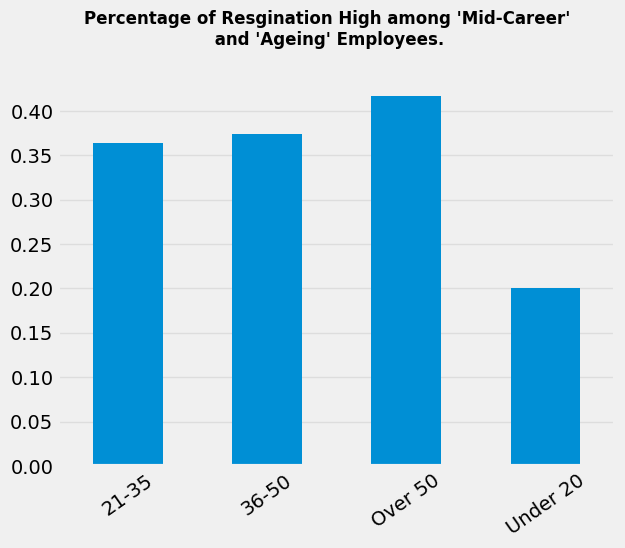

In [55]:
age_grp_pvt = combined_updated.pivot_table(values='dissatisfied', index='age_group')
plt.figure(figsize=(12,8))
style.use('fivethirtyeight')
age_grp_pvt.plot(kind='bar', legend=False, rot=35)
plt.xlabel('')
plt.grid(axis='x', visible=False)
plt.grid(axis='y', alpha=0.5)
plt.suptitle("Percentage of Resgination High among 'Mid-Career'\n and 'Ageing' Employees.", ha='center', weight='bold', size=12, x=0.5, y=1.02)
plt.show()

From the above analysis we can conclude that mid-career employees and the ageing generation are more likely to resign due to dissatisfaction than the younger employees.

# Conclusion

The objective of our analysis was to answer the following questions;
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We combined both the datasets (DETE and TAFE), did exploratory and explanatory analysis and observed the following conclusions;

- Employees with a length service of 7 years and above (veterans and established), are more likely to resign due to dissatisfaction compared to employees with less than 7 years ('Newbies' and 'Experienced')

- Mid-carrer employees and the ageing/senior generation are more likely to resign due to dissatisfaction compared to the younger employees.

The above conclusions answer our objectives respectively.